In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

df=pd.read_csv("/Users/saikarthik/Desktop/Nexus-S1 Deakin /dataset/cleaned.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
scaler = StandardScaler()
X = df[['value']].values
X_scaled = scaler.fit_transform(X)




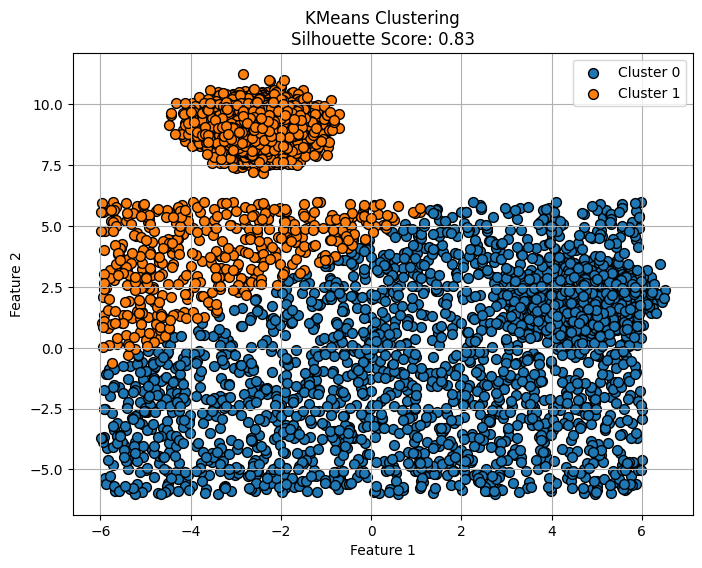

In [10]:

n_samples = len(X_scaled)
X_synthetic, _ = make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=0.5, random_state=42)
n_outliers = n_samples // 10
X_synthetic = np.concatenate([X_synthetic, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_synthetic)
silhouette_kmeans = silhouette_score(X_synthetic, y_kmeans)

colors = ['#1f77b4', '#ff7f0e'] 

plt.figure(figsize=(8, 6))
for cluster in np.unique(y_kmeans):
    plt.scatter(X_synthetic[y_kmeans == cluster, 0], X_synthetic[y_kmeans == cluster, 1],
                color=colors[cluster], label=f'Cluster {cluster}', edgecolor='k', s=50)
plt.title(f'KMeans Clustering\nSilhouette Score: {silhouette_kmeans:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


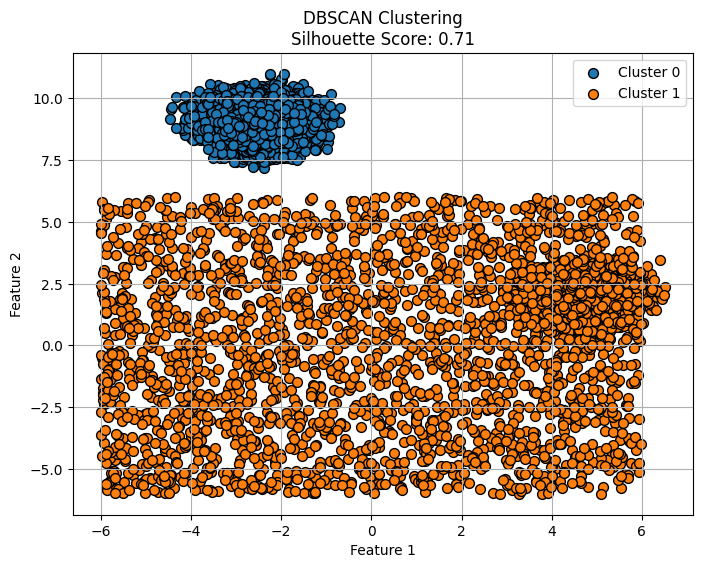

In [11]:

n_samples = len(X_scaled)
X_synthetic, _ = make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=0.5, random_state=42)
n_outliers = n_samples // 10
X_synthetic = np.concatenate([X_synthetic, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_synthetic)
silhouette_dbscan = np.nan if len(set(y_dbscan)) <= 1 else silhouette_score(X_synthetic, y_dbscan)

colors = ['#1f77b4', '#ff7f0e']  

plt.figure(figsize=(8, 6))
for cluster in np.unique(y_dbscan):
    if cluster != -1:  # Exclude noise
        plt.scatter(X_synthetic[y_dbscan == cluster, 0], X_synthetic[y_dbscan == cluster, 1],
                    color=colors[cluster % len(colors)], label=f'Cluster {cluster}', edgecolor='k', s=50)
plt.title(f'DBSCAN Clustering\nSilhouette Score: {silhouette_dbscan:.2f}' if not np.isnan(silhouette_dbscan) else 'DBSCAN Clustering\nSilhouette Score: N/A')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


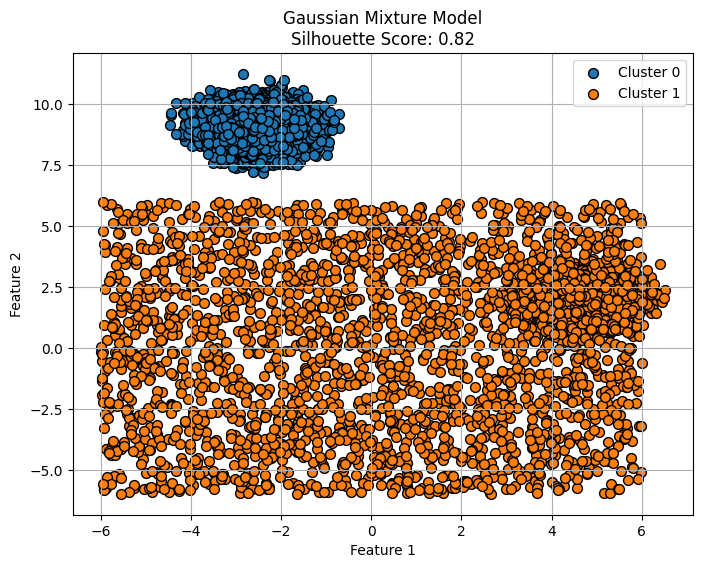

In [12]:
n_samples = len(X_scaled)
X_synthetic, _ = make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=0.5, random_state=42)
n_outliers = n_samples // 10
X_synthetic = np.concatenate([X_synthetic, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

gmm = GaussianMixture(n_components=2, random_state=42)
y_gmm = gmm.fit_predict(X_synthetic)
silhouette_gmm = silhouette_score(X_synthetic, y_gmm)

colors = ['#1f77b4', '#ff7f0e']  

plt.figure(figsize=(8, 6))
for cluster in np.unique(y_gmm):
    plt.scatter(X_synthetic[y_gmm == cluster, 0], X_synthetic[y_gmm == cluster, 1],
                color=colors[cluster], label=f'Cluster {cluster}', edgecolor='k', s=50)
plt.title(f'Gaussian Mixture Model\nSilhouette Score: {silhouette_gmm:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
